**Full Name:** Pranshu Srivastav  <br>
**Panther ID:** 002605285 - psrivastav <br> <br>

**Declaration:** <br>
The following code represents my own work. I have neither received nor given inappropriate assistance. I have not copied or modified code from any source other than the course webpage or the course textbook. I recognize that any unauthorized assistance or plagiarism will be handled in accordance with Georgia State University's Academic Honesty Policy and the policies of this course. I recognize that my work is based on an assignment created by the Institute for Insight at the Georgia State University. Any publishing or posting of source code for this project is strictly prohibited unless you have written consent from the Institute for Insight at Georgia State University.
<br> <br>

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd

#for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

#for splitting the data
from sklearn.model_selection import train_test_split

#model related imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

#plotting related imports
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data into data frames
df_rides = pd.read_csv('cab_rides.csv')
df_weather = pd.read_csv('weather.csv')

In [3]:
#initial analysis of columns and totals
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [5]:
#identifying null values
df_rides.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [6]:
#removing the rows will null values
df_rides = df_rides.dropna(axis=0).reset_index(drop=True)

In [7]:
#verification
df_rides.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [8]:
df_rides['date'] = pd.to_datetime(df_rides['time_stamp']/ 1000, unit = 's')

In [9]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  int64         
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  date              637976 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 53.5+ MB


In [10]:
df_weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [11]:
#replacing null values with 0
df_weather = df_weather.fillna(0)

In [12]:
#verification
df_weather.isna().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [13]:
#Taking a mean of all the weather conditions and grouping by locations
df_weather = df_weather.groupby('location').mean()

In [14]:
#Since we're taking mean, we don't require the timestamp
df_weather = df_weather.drop('time_stamp', axis = 1)

In [15]:
df_weather.reset_index(drop = False)

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [16]:
#encoding the cab type values
le = LabelEncoder()
cab_type = le.fit_transform(df_rides['cab_type'])

df_rides['cab_type'] = cab_type

In [17]:
#encoding the product id values
product_id = le.fit_transform(df_rides['product_id'])
df_rides['product_id'] = product_id

In [18]:
#analysis of price with name
df_rides_name = df_rides.groupby(by = ['name']).agg({'price':'mean'})
df_rides_name.sort_values(by = 'price', inplace = True)

Text(0.5, 0, 'Vehicle Name')

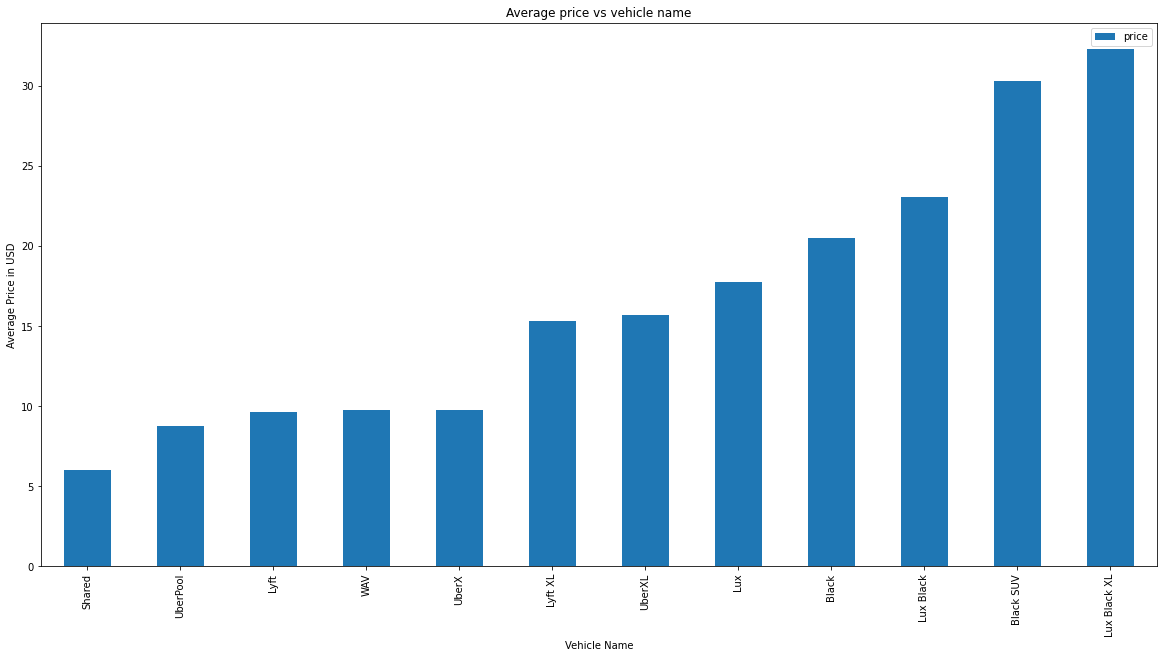

In [19]:
#Plotting the relationship
df_rides_name.plot(kind = 'bar', figsize = (20,10))
plt.title("Average price vs vehicle name")
plt.ylabel('Average Price in USD')
plt.xlabel('Vehicle Name')

In [20]:
df_rides_dist = df_rides.groupby(by = ['distance']).agg({'price':'mean'})

Text(0.5, 0, 'Distance')

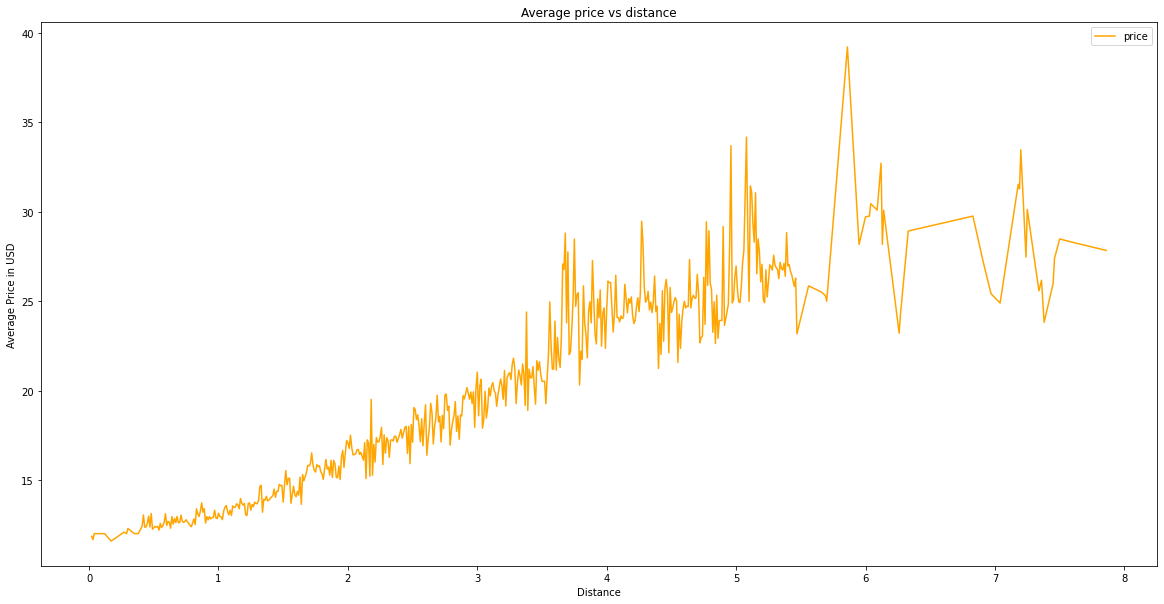

In [21]:
#analysis of avg price with distance
df_rides_dist.plot(kind = 'line', figsize = (20,10), color = 'orange')
plt.title("Average price vs distance")
plt.ylabel('Average Price in USD')
plt.xlabel('Distance')

In [22]:
df_rides_surge = df_rides.groupby(by = ['surge_multiplier']).agg({'price':'mean'})

Text(0.5, 0, 'Surge Multiplier')

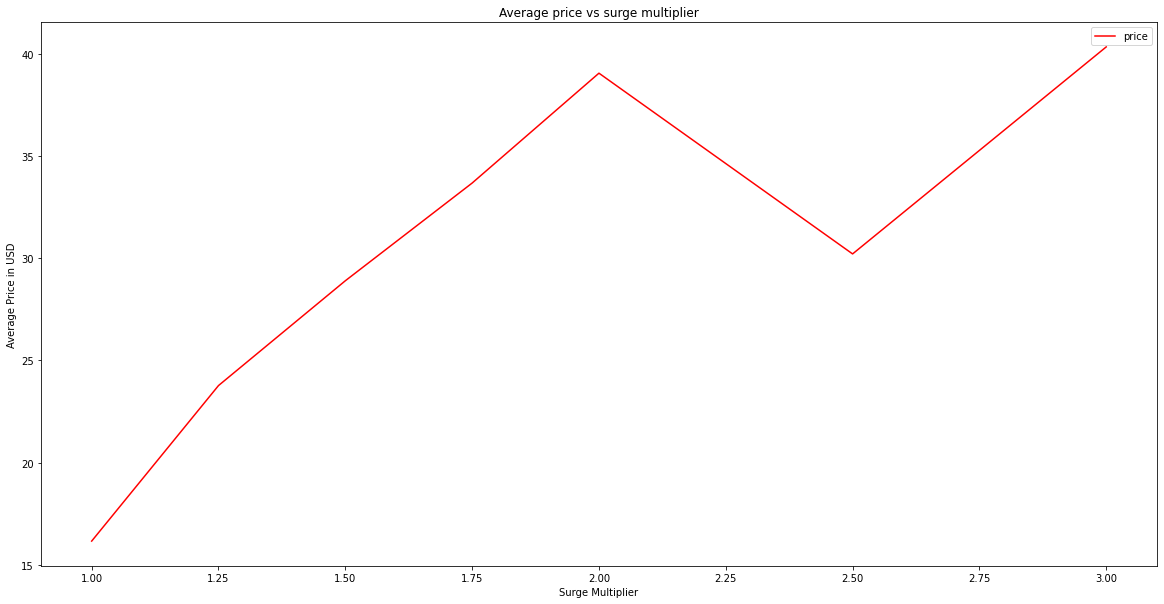

In [23]:
#analysis of avg price with surge multiplier
df_rides_surge.plot(kind = 'line', figsize = (20,10), color = 'red')
plt.title("Average price vs surge multiplier")
plt.ylabel('Average Price in USD')
plt.xlabel('Surge Multiplier')

In [24]:
#creating hour and day of the week features from timestamp
df_rides = df_rides.drop(['time_stamp'], axis = 1)
df_rides['hour'] = pd.DatetimeIndex(df_rides['date']).hour
df_rides['day'] = pd.DatetimeIndex(df_rides['date']).dayofweek
df_rides.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hour,day
0,0.44,0,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,7,Shared,2018-12-16 09:30:07.890000128,9,6
1,0.44,0,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,11,Lux,2018-11-27 02:00:23.676999936,2,1
2,0.44,0,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,6,Lyft,2018-11-28 01:00:22.197999872,1,2
3,0.44,0,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,9,Lux Black XL,2018-11-30 04:53:02.749000192,4,4
4,0.44,0,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,10,Lyft XL,2018-11-29 03:49:20.223000064,3,3


Text(0.5, 0, 'Day of week')

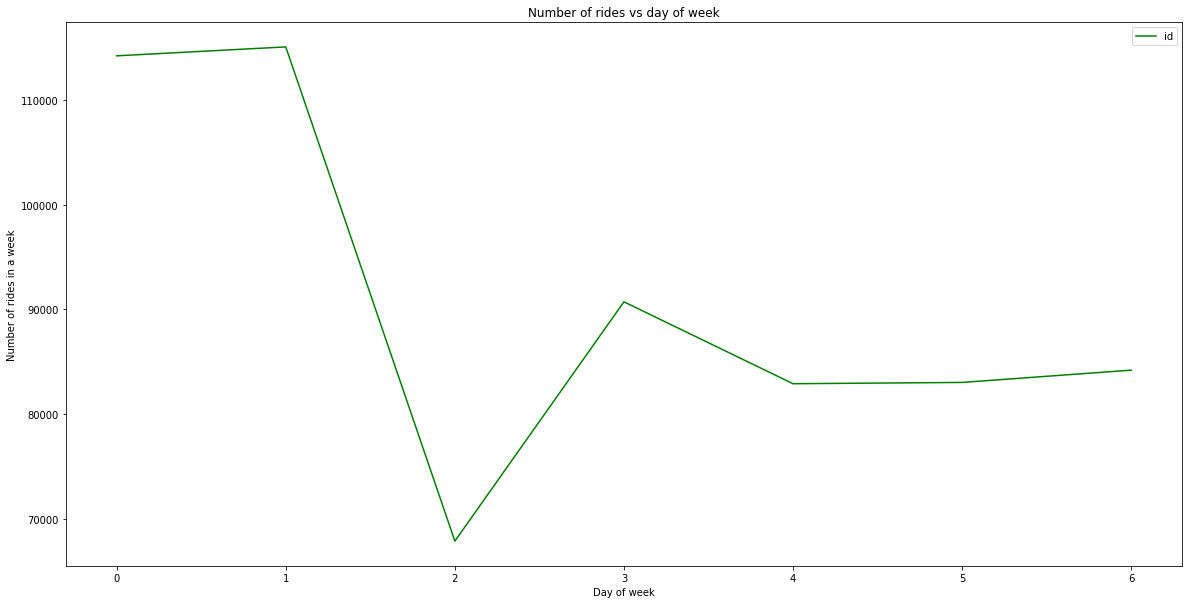

In [25]:
#analysis of number of rides with day of the week
df_rides_day = df_rides.groupby(by = ['day']).agg({'id':'count'})
df_rides_day.plot(kind = 'line', figsize = (20,10), color = 'green')
plt.title("Number of rides vs day of week")
plt.ylabel('Number of rides in a week')
plt.xlabel('Day of week')

Text(0.5, 0, 'Day of week')

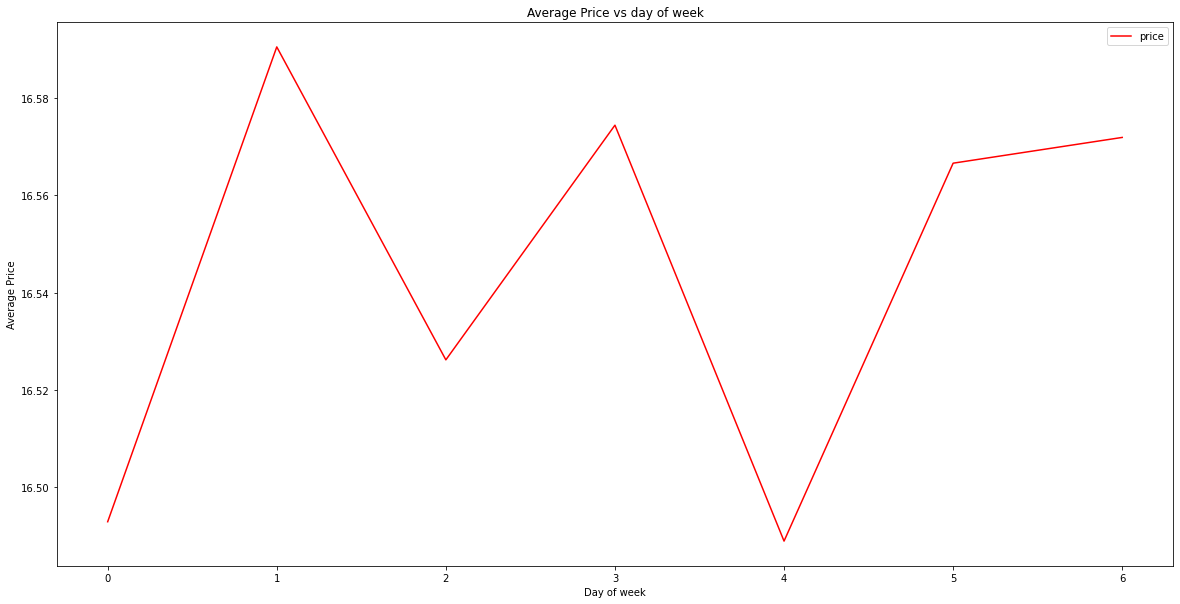

In [26]:
#analysis of avg price with day of the week
df_rides_day_price = df_rides.groupby(by = ['day']).agg({'price':'mean'})
df_rides_day_price.plot(kind = 'line', figsize = (20,10), color = 'red')
plt.title("Average Price vs day of week")
plt.ylabel('Average Price')
plt.xlabel('Day of week')

Text(0.5, 0, 'Hour of day')

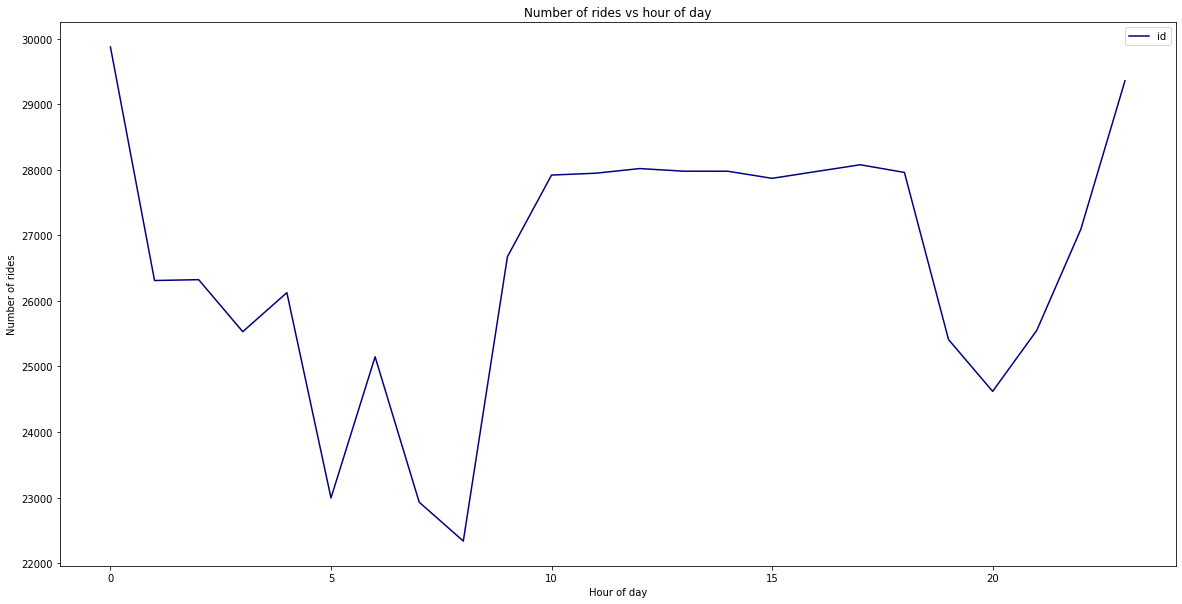

In [27]:
#analysis of number of rides with hour of the day
df_rides_hour_num = df_rides.groupby(by = ['hour']).agg({'id':'count'})
df_rides_hour_num.plot(kind = 'line', figsize = (20,10), color = 'navy')
plt.title("Number of rides vs hour of day")
plt.ylabel('Number of rides')
plt.xlabel('Hour of day')

Text(0.5, 0, 'Hour of day')

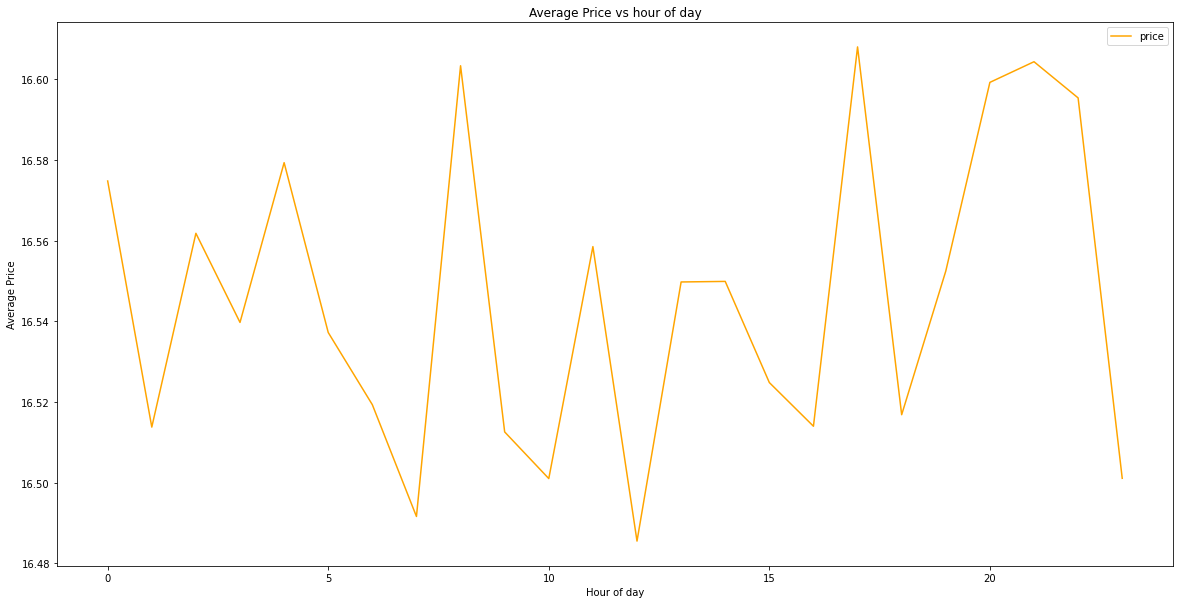

In [28]:
#analysis of avg price with hour of the day
df_rides_hour_price = df_rides.groupby(by = ['hour']).agg({'price':'mean'})
df_rides_hour_price.plot(kind = 'line', figsize = (20,10), color = 'orange')
plt.title("Average Price vs hour of day")
plt.ylabel('Average Price')
plt.xlabel('Hour of day')

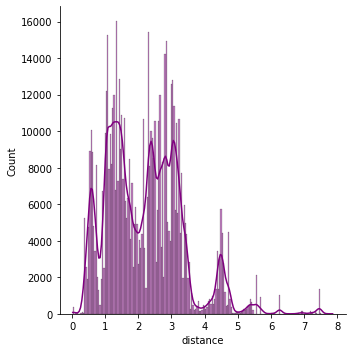

In [29]:
# Following are the box plots and freq distributions of various numerical features for weather and rides dataframe
sns.displot(df_rides, x="distance", color = 'purple', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2b06f2490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2b06f2bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2b06d9fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2b06fd310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2b06fd6a0>],
 'means': []}

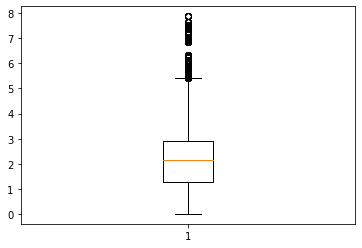

In [30]:
plt.boxplot(df_rides['distance'])

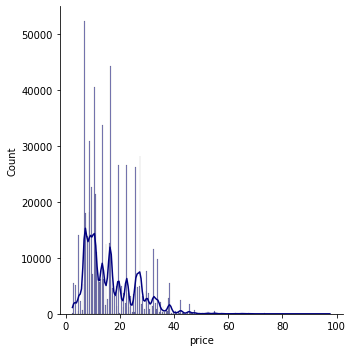

In [31]:
sns.displot(df_rides, x="price", color = 'navy', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa29da5a5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa29da5ad00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa29da5a250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa29daa2460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa29daa27f0>],
 'means': []}

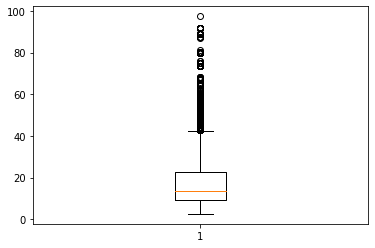

In [32]:
plt.boxplot(df_rides['price'])

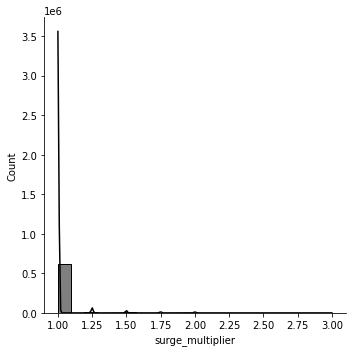

In [33]:
sns.displot(df_rides, x="surge_multiplier", color = 'black', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a4d50310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a4d50a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a4d500a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a4d58190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a4d58520>],
 'means': []}

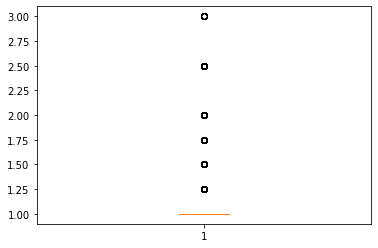

In [34]:
plt.boxplot(df_rides['surge_multiplier'])

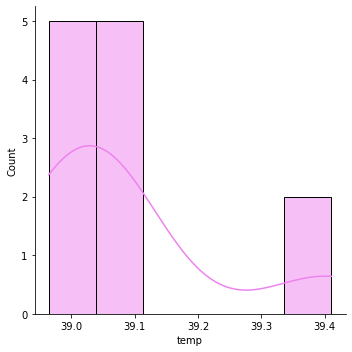

In [35]:
sns.displot(df_weather, x="temp", color = 'violet', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a4f22fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a4f2e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a4f22c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a4f2ee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a4f38220>],
 'means': []}

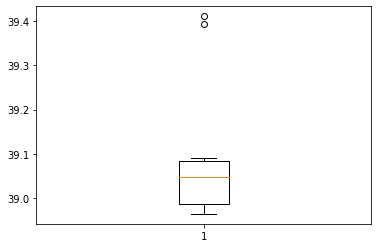

In [36]:
plt.boxplot(df_weather['temp'])

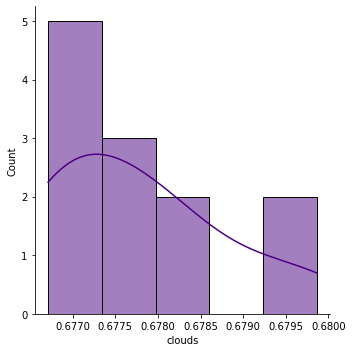

In [37]:
sns.displot(df_weather, x="clouds", color = 'indigo', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a5078e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a5085580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a5078a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a5085ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a527a070>],
 'means': []}

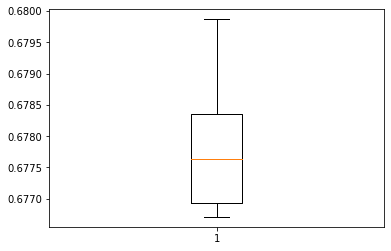

In [38]:
plt.boxplot(df_weather['clouds'])

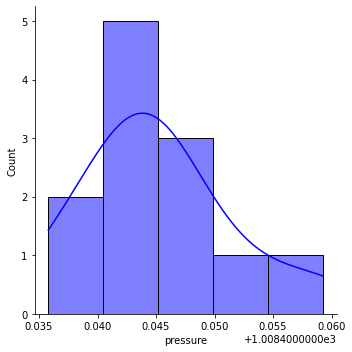

In [39]:
sns.displot(df_weather, x="pressure", color = 'blue', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a552d280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a552d9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a531ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a5537100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a5537490>],
 'means': []}

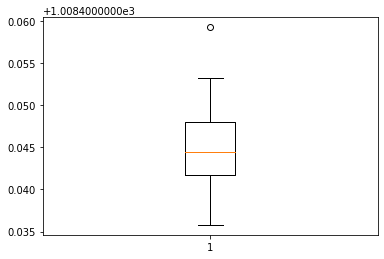

In [40]:
plt.boxplot(df_weather['pressure'])

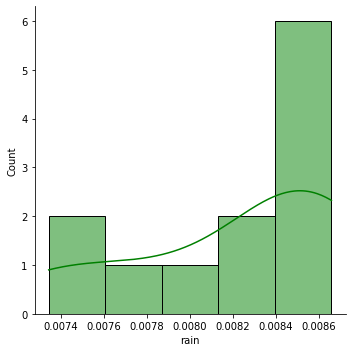

In [41]:
sns.displot(df_weather, x="rain", color = 'green', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a57fefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a580c730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a57fec40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a580ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a5817220>],
 'means': []}

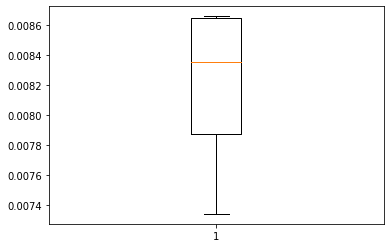

In [42]:
plt.boxplot(df_weather['rain'])

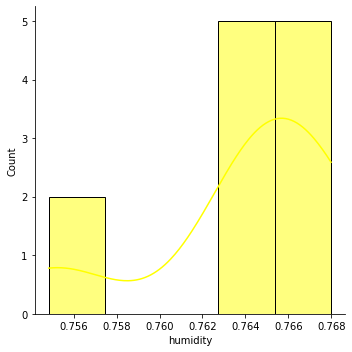

In [43]:
sns.displot(df_weather, x="humidity", color = 'yellow', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a5ad32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a5ad3a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a5ac9f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a5adb160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a5adb4f0>],
 'means': []}

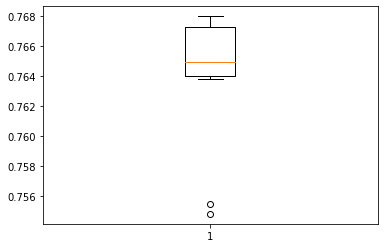

In [44]:
plt.boxplot(df_weather['humidity'])

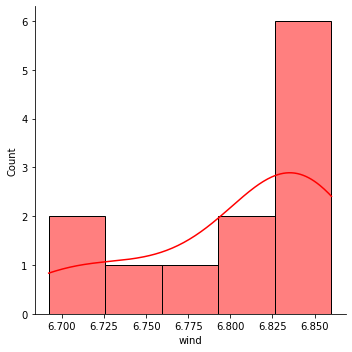

In [45]:
sns.displot(df_weather, x="wind", color = 'red', kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a5d8f100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a5d8f820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a5b84d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a5d8ff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a5d98310>],
 'means': []}

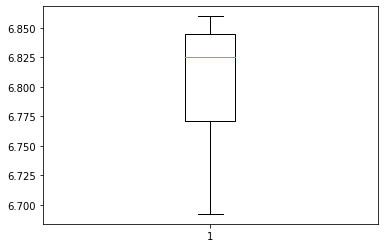

In [46]:
plt.boxplot(df_weather['wind'])

In [47]:
df_weather.reset_index(drop = False, inplace = True)
df_weather

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [48]:
#creating two separate source and destination weather df so that they can be merged with the rides df and we can go ahead and make the ABT
source_weather_df = df_weather.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

In [49]:
source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [50]:
destination_weather_df = df_weather.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

In [51]:
destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [52]:
#merging the tables
df_main_temp = df_rides.merge(source_weather_df, left_on = 'source', right_on = 'source', how = 'inner')

In [53]:
#making the main ABT table
df_main = df_main_temp.merge(destination_weather_df, left_on = 'destination', right_on = 'destination', how = 'inner')

In [54]:
#further encoding
cab_name = le.fit_transform(df_main['name'])

df_main['name'] = cab_name

In [55]:
source = le.fit_transform(df_main['source'])

df_main['source'] = source

In [56]:
destination = le.fit_transform(df_main['destination'])

df_main['destination'] = destination

In [57]:
df_main.drop('id', axis = 1, inplace = True)
df_main.drop('date', axis = 1, inplace = True)

In [58]:
#final df structure
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              637976 non-null  float64
 1   cab_type              637976 non-null  int64  
 2   destination           637976 non-null  int64  
 3   source                637976 non-null  int64  
 4   price                 637976 non-null  float64
 5   surge_multiplier      637976 non-null  float64
 6   product_id            637976 non-null  int64  
 7   name                  637976 non-null  int64  
 8   hour                  637976 non-null  int64  
 9   day                   637976 non-null  int64  
 10  source_temp           637976 non-null  float64
 11  source_clouds         637976 non-null  float64
 12  source_pressure       637976 non-null  float64
 13  source_rain           637976 non-null  float64
 14  source_humidity       637976 non-null  float64
 15  

In [59]:
#numerical statistics
df_main.describe()

,distance,cab_type,destination,source,price,surge_multiplier,product_id,name,hour,day,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,0.518151,5.496882,5.496768,16.545125,1.015068,5.391096,5.536285,11.618528,2.781699,...,1008.445196,0.008212,0.763968,6.802865,39.091084,0.677776,1008.445196,0.008212,0.763968,6.802865
std,1.135413,0.499671,3.449890,3.449948,9.324359,0.095422,3.450342,3.493695,6.948776,2.056670,...,0.006164,0.000478,0.004214,0.054701,0.145905,0.000980,0.006164,0.000478,0.004214,0.054700
min,0.020000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1008.435793,0.007343,0.754837,6.692180,38.964379,0.676711,1008.435793,0.007343,0.754837,6.692180
25%,1.270000,0.000000,3.000000,3.000000,9.000000,1.000000,2.000000,2.000000,6.000000,1.000000,...,1008.441090,0.007738,0.763786,6.749426,38.986711,0.676730,1008.441090,0.007738,0.763786,6.749426
50%,2.160000,1.000000,5.000000,5.000000,13.500000,1.000000,5.000000,6.000000,12.000000,3.000000,...,1008.444168,0.008405,0.764837,6.834302,39.047744,0.677495,1008.444168,0.008405,0.764837,6.834302
75%,2.930000,1.000000,8.000000,8.000000,22.500000,1.000000,8.000000,9.000000,18.000000,5.000000,...,1008.447820,0.008644,0.767266,6.848948,39.090841,0.678432,1008.447820,0.008644,0.767266,6.848948
max,7.860000,1.000000,11.000000,11.000000,97.500000,3.000000,11.000000,11.000000,23.000000,6.000000,...,1008.459254,0.008660,0.767992,6.860019,39.410822,0.679866,1008.459254,0.008660,0.767992,6.860019


Text(0.5, 1.0, 'Feature Correlation Table')

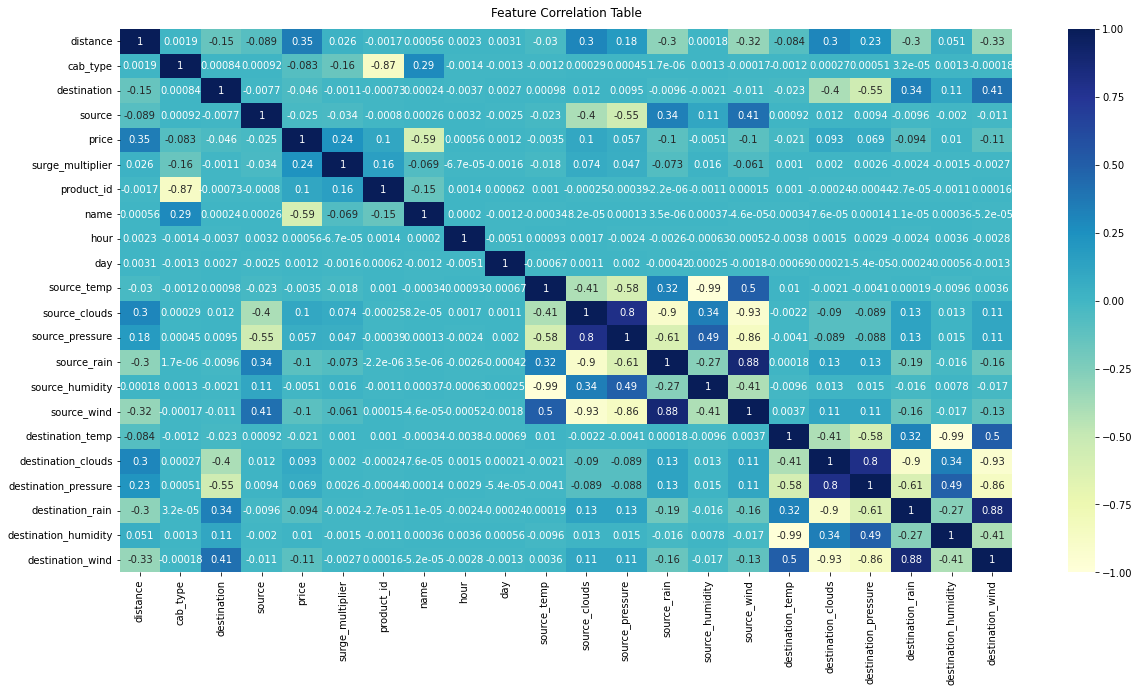

In [60]:
#plotting and identifying the correlation matrix
plt.figure(figsize = (20, 10))
heat_map = sns.heatmap(df_main.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'YlGnBu')
heat_map.set_title('Feature Correlation Table', fontdict = {'fontsize' : 12}, pad = 12)

In [61]:
#getting rid of the X variables which have high correlation among each other but have a low correlation with the target variable
df_main = df_main.drop('source_temp', axis=1)
df_main = df_main.drop('source_wind', axis=1)
df_main = df_main.drop('source_clouds', axis=1)
df_main = df_main.drop('source_rain', axis=1)
df_main = df_main.drop('destination_humidity', axis=1)
df_main = df_main.drop('destination_clouds', axis=1)
df_main = df_main.drop('destination_pressure', axis=1)
df_main = df_main.drop('destination_rain', axis=1)
df_main = df_main.drop('cab_type', axis=1)

Text(0.5, 1.0, 'Feature Correlation Table')

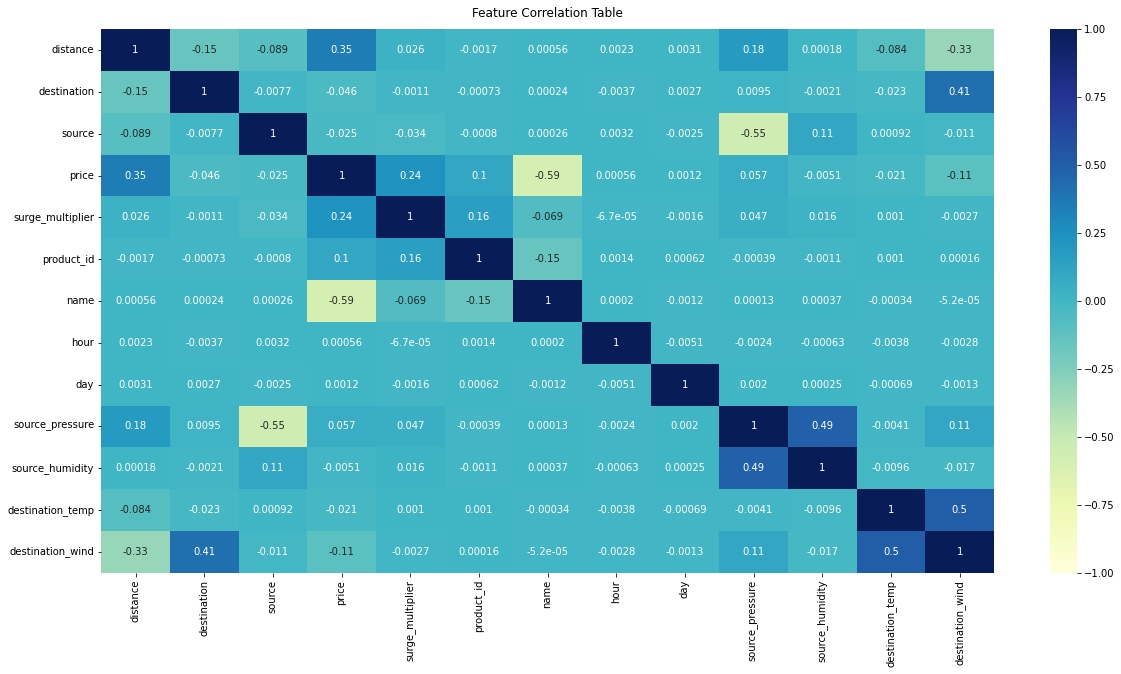

In [62]:
#plotting the updated correlation matrix
plt.figure(figsize = (20, 10))
heat_map = sns.heatmap(df_main.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'YlGnBu')
heat_map.set_title('Feature Correlation Table', fontdict = {'fontsize' : 12}, pad = 12)

In [63]:
#final table to be used for the model
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          637976 non-null  float64
 1   destination       637976 non-null  int64  
 2   source            637976 non-null  int64  
 3   price             637976 non-null  float64
 4   surge_multiplier  637976 non-null  float64
 5   product_id        637976 non-null  int64  
 6   name              637976 non-null  int64  
 7   hour              637976 non-null  int64  
 8   day               637976 non-null  int64  
 9   source_pressure   637976 non-null  float64
 10  source_humidity   637976 non-null  float64
 11  destination_temp  637976 non-null  float64
 12  destination_wind  637976 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 68.1 MB


In [64]:
#Assigning the target variable
y = df_main['price']

In [65]:
#Assigning the independent variables/features
X = df_main.drop('price', axis=1)

In [66]:
X.describe()

,distance,destination,source,surge_multiplier,product_id,name,hour,day,source_pressure,source_humidity,destination_temp,destination_wind
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,5.496882,5.496768,1.015068,5.391096,5.536285,11.618528,2.781699,1008.445196,0.763968,39.091084,6.802865
std,1.135413,3.449890,3.449948,0.095422,3.450342,3.493695,6.948776,2.056670,0.006164,0.004214,0.145905,0.054700
min,0.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1008.435793,0.754837,38.964379,6.692180
25%,1.270000,3.000000,3.000000,1.000000,2.000000,2.000000,6.000000,1.000000,1008.441090,0.763786,38.986711,6.749426
50%,2.160000,5.000000,5.000000,1.000000,5.000000,6.000000,12.000000,3.000000,1008.444168,0.764837,39.047744,6.834302
75%,2.930000,8.000000,8.000000,1.000000,8.000000,9.000000,18.000000,5.000000,1008.447820,0.767266,39.090841,6.848948
max,7.860000,11.000000,11.000000,3.000000,11.000000,11.000000,23.000000,6.000000,1008.459254,0.767992,39.410822,6.860019


In [67]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 15)

In [69]:
#Initially using linear regression model and calculating RMSE and R_square
model = LinearRegression()
model.fit(X_train, y_train)
yhat1 = model.predict(X_test)
print("Test R^2 Score: {:.5f}".format(model.score(X_test, y_test)))
print("Test RMSE Score: {:.5f}".format(mean_squared_error(y_test, yhat1, squared=False),3))
adj_r2 = 1 - (1 - model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))

Test R^2 Score: 0.50201
Test RMSE Score: 6.59789
Test Adjusted R^2 Score: 0.50200


In [71]:
# Using the same linear regression model but with a targetted quantile transformer
model = LinearRegression()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat2 = regr_trans.predict(X_test)
print("Test R^2 Score: {:.5f}".format(round(r2_score(y_test, yhat2), 3)))
print("Test RMSE Score: {:.5f}".format(round(mean_squared_error(y_test, yhat2, squared=False),3)))
adj_r2 = 1 - (1 - r2_score(y_test, yhat2))*(len(yhat2)-1)/(len(yhat2)-X_train.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))


Test R^2 Score: 0.50900
Test RMSE Score: 6.55000
Test Adjusted R^2 Score: 0.50900


In [73]:
# further improving the model performance by using the gradient boosting regressor
mod = GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
mod.fit(X_train, y_train)
yhat3 = mod.predict(X_test)
print("Test R^2 Score: {:.5f}".format(round(r2_score(y_test, yhat3), 3)))
print("Test RMSE Score: {:.5f}".format(round(mean_squared_error(y_test, yhat3, squared=False),3)))
adj_r2 = 1 - (1 - r2_score(y_test, yhat3))*(len(yhat3)-1)/(len(yhat3)-X_train.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))

Test R^2 Score: 0.67500
Test RMSE Score: 5.33100
Test Adjusted R^2 Score: 0.67500


In [76]:
# Using XGB as a boosting mechanism and measure model performance
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
  
# Predict the model
yhat4 = xgb_r.predict(X_test)
print("Test R^2 Score: {:.5f}".format(round(r2_score(y_test, yhat4), 3)))
print("Test RMSE Score: {:.5f}".format(round(mean_squared_error(y_test, yhat4, squared=False),3)))
adj_r2 = 1 - (1 - r2_score(y_test, yhat4))*(len(yhat4)-1)/(len(yhat4)-X_train.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))

Test R^2 Score: 0.95900
Test RMSE Score: 1.88300
Test Adjusted R^2 Score: 0.95900


In [78]:
#Using decision tree regressor with quantile transformer and calculating RMSE and R_square
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat5 = regr_trans.predict(X_test)
print("Test R^2 Score: {:.5f}".format(round(r2_score(y_test, yhat5), 3)))
print("Test RMSE Score: {:.5f}".format(round(mean_squared_error(y_test, yhat5, squared=False),3)))
adj_r2 = 1 - (1 - r2_score(y_test, yhat5))*(len(yhat5)-1)/(len(yhat5)-X_train.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))


Test R^2 Score: 0.94600
Test RMSE Score: 2.16400
Test Adjusted R^2 Score: 0.94600


In [80]:
# By looking at the performance improvements, using random forest for taking ensemble averages
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regr_trans = TransformedTargetRegressor(regressor=rf, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat6 = regr_trans.predict(X_test)
print("Test R^2 Score: {:.5f}".format(round(r2_score(y_test, yhat6), 3)))
print("Test RMSE Score: {:.5f}".format(round(mean_squared_error(y_test, yhat6, squared=False),3)))
adj_r2 = 1 - (1 - r2_score(y_test, yhat6))*(len(yhat6)-1)/(len(yhat6)-X_train.shape[1]-1)
print("Test Adjusted R^2 Score: {:.5f}".format(round(adj_r2, 3)))

Test R^2 Score: 0.96100
Test RMSE Score: 1.85500
Test Adjusted R^2 Score: 0.96100


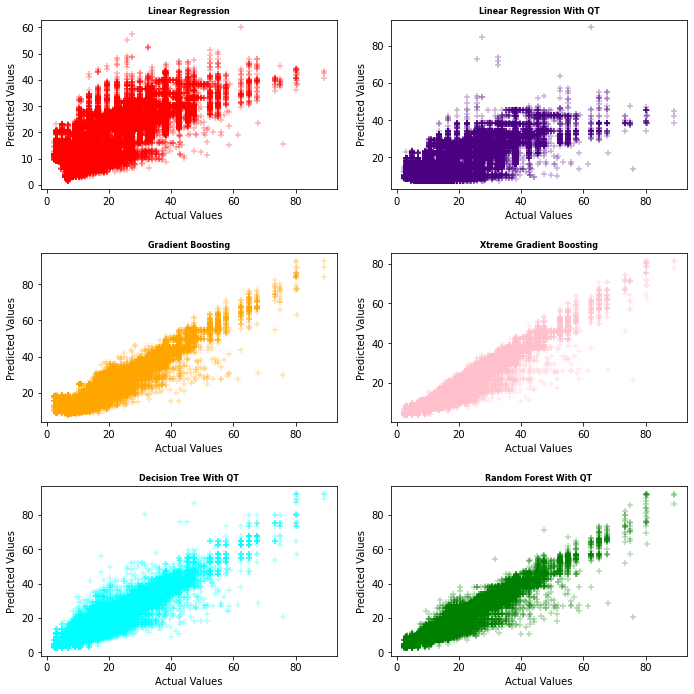

In [85]:
#Creating the subplot showcasing the performance comparison 
fig, axs = plt.subplots(3, 2, figsize = (10, 10))

#plt.plot('sepal_length','sepal_width',data=df,color='olive', ax=axs[0, 0])
axs[0,0].scatter(x = y_test, y = yhat1, color = 'red', marker = '+', alpha = 0.3)
axs[0,0].set_title('Linear Regression', fontsize = 8, fontweight = 'bold')
axs[0,1].scatter(x = y_test, y = yhat2, color = 'indigo', marker = '+', alpha = 0.3)
axs[0,1].set_title('Linear Regression With QT', fontsize = 8, fontweight = 'bold')
axs[1,0].scatter(x = y_test, y = yhat3, color = 'orange', marker = '+', alpha = 0.3)
axs[1,0].set_title('Gradient Boosting', fontsize = 8, fontweight = 'bold')
axs[1,1].scatter(x = y_test, y = yhat4, color = 'pink', marker = '+', alpha = 0.3)
axs[1,1].set_title('Xtreme Gradient Boosting', fontsize = 8, fontweight = 'bold')
axs[2,0].scatter(x = y_test, y = yhat5, color = 'cyan', marker = '+', alpha = 0.3)
axs[2,0].set_title('Decision Tree With QT', fontsize = 8, fontweight = 'bold')
axs[2,1].scatter(x = y_test, y = yhat6, color = 'green', marker = '+', alpha = 0.3)
axs[2,1].set_title('Random Forest With QT', fontsize = 8, fontweight = 'bold')


for ax in axs.flat:
    ax.set(xlabel = 'Actual Values', ylabel = 'Predicted Values')
   
fig.tight_layout(pad = 2.0)

#Show the plot
plt.show()